Utilice el lenguaje de programación Python para realizar lo siguiente:

1. En un script de python utilice el paquete sklearn.datasets para descargar el dataset Iris Plant. Este dataset tiene 150 vectores de 4 dimensiones divididos en 3 clases (Setosa, Virginica y Versicolor) 

2. Utilice el algoritmo PCA para generar dos nuevas versiones de dataset Iris3D y Iris2D. Iris3D será el resultado de reducir la dimensionalidad original de Iris Plant con las 3 primeras componentes principales de PCA e Iris2D con las 2 primeras componentes.

3. Aplique el algoritmo k-means a las 3 versiones del dataset (Iris plant original, con 4 dimensiones, Iris3D e Iris2D). Deberá usar una k=3 para formar 3 clusters en cada una de las 3 versiones del dataset. Grafique el resultado de la clusterización para Iris3D e Iris2D.

4. Imprima en consola los centros obtenidos para cada una de las 3 versiones del dataset.

5. El clasificador de mínima distancia lo agregará en la próxima clase (viernes 2 de septiembre) con ayuda del profesor. Por lo tanto, la práctica se evaluará hasta el paso 4 debido a que tienen menos tiempo para realizarla.

6. Suba su script a esta plataforma con el nombre ML_Apellidos_NUA_Prac2_irisPlant.ZIP o . RAR, recuerden enviarlo comprimido para evitar bloqueos de seguridad de la plataforma.(recuerde no utilizar caracteres especiales como acentos, ñ, ë, etc.)

In [86]:
import matplotlib.pyplot as plt
plt.rcParams["figure.subplot.right"] = 0.8
import numpy as np
import pandas as pd
import itertools 
from sklearn.cluster import KMeans
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
#!pip update scikit-learn
#!pip install scikit-learn==1.1
#from sklearn import inspection#!pip install inspection 


In [87]:
from sklearn.inspection import DecisionBoundaryDisplay 
iris = datasets.load_iris()
X = iris.data[:, :4]          # Array like of shape eje0 (150 puntos) de eje1 (dim 4)
y = iris.target               # Etiquetas
t_names = iris.target_names
f_names = iris.feature_names  # In cm as unit of length
#n=np.size(X,1)               # Tamaño de eje1 de los datos

##Iris Plant visualization or visualizating high dimensional spaces
To see how the species in the dataset are grouped one plots all the features one against the other, so by the end an $N\times N$ matrix, or in particular $4\times4$, thus we can see how sepal_width is compared against sepal_length, then against petal_width, and so forth.

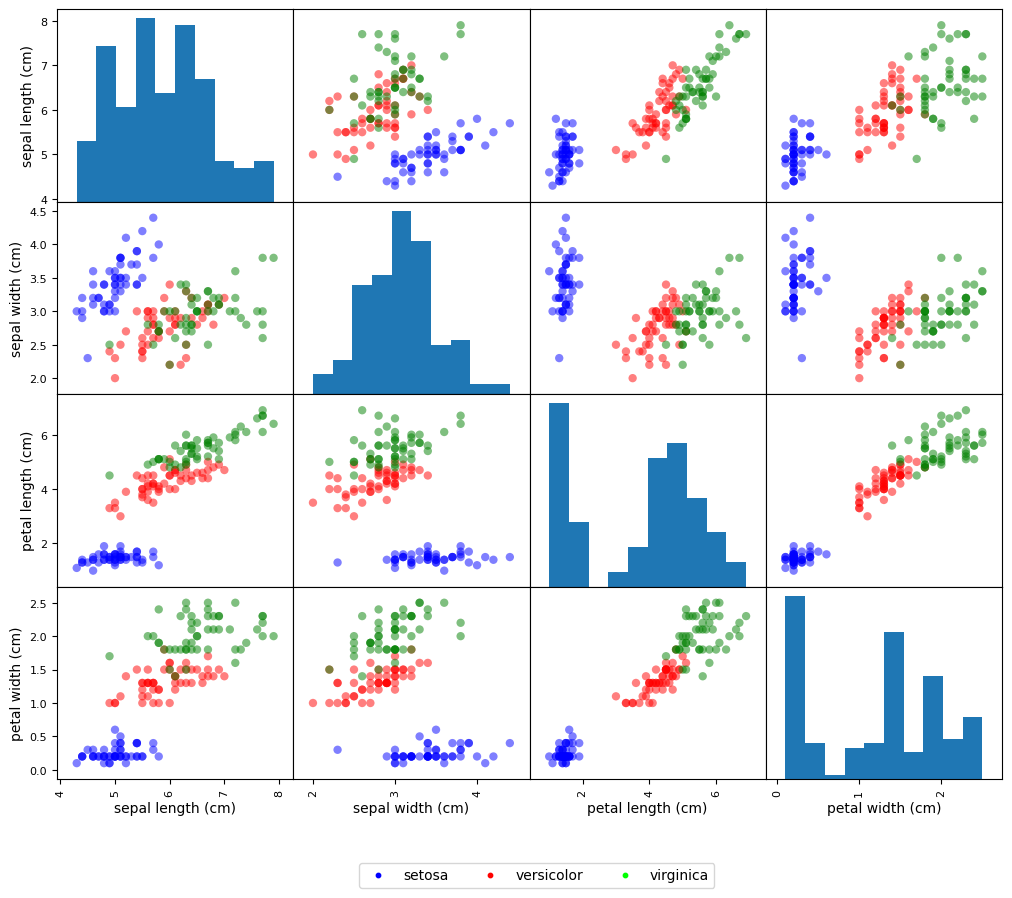

In [88]:
from pandas.plotting import scatter_matrix
LABEL_COLOR_MAP = {0 : 'b',1 : 'r',2 : 'g'} # Cluster color by custom cmap, but matching brg gradient
label_color = [LABEL_COLOR_MAP[l] for l in y]

df = pd.DataFrame(X, columns = f_names)
grr = scatter_matrix(df, alpha = 0.5, figsize = (14, 10), diagonal = 'hist', c = label_color, label=t_names, marker='o',range_padding=0.2)
handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker="o", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
plt.legend(handles, t_names, loc="center", bbox_to_anchor=(-0.97, -0.5), shadow=False, ncol=3)
plt.show()


The histograms are the distribution of a single given feature. Either row or column.
We can see how some of the pair plots (subplots), show alike colored dots form several clusters with clean boundaries, that is, unlike sepal length and sepal width. Petal length and petal width have very distinctive clusters.

##Singular Value Decomposition.

Linear dimensionality reduction to project data to a lower dimensional space. 

In [89]:
                          
#i = 0
#pca = "pca{}".format(i)
#reduced = "X_{}D".format(i) 
dimensions, pca, reduced = [2,3,4], [], []
c = 0
for i in dimensions:
    pca.append(PCA(n_components = i)) 
    reduced.append(pca[c].fit_transform(X)) # Fit model with X and apply dimensionality reduction on X
    print(pca[c].explained_variance_ratio_, pca[c].singular_values_)
    c += 1

[0.92461872 0.05306648] [25.09996044  6.01314738]
[0.92461872 0.05306648 0.01710261] [25.09996044  6.01314738  3.41368064]
[0.92461872 0.05306648 0.01710261 0.00521218] [25.09996044  6.01314738  3.41368064  1.88452351]


c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


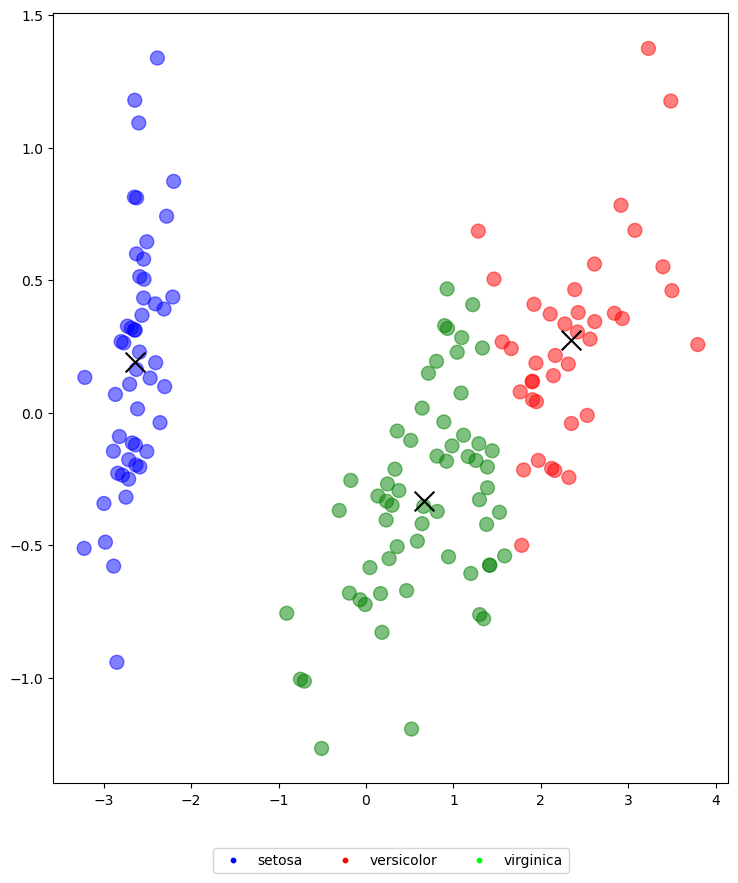

In [98]:
kmeans_pca = KMeans(n_clusters = 3)
X4_clustered = kmeans_pca.fit_predict(reduced[2])  # Compute cluster centers and predict cluster index for each sample
X3_clustered = kmeans_pca.fit_predict(reduced[1])
centers3 = kmeans_pca.cluster_centers_
X2_clustered = kmeans_pca.fit_predict(reduced[0])
centers2 = kmeans_pca.cluster_centers_

label_color = [LABEL_COLOR_MAP[l] for l in X2_clustered]

plt.figure(figsize = (10,10))
plt.scatter(reduced[0][:,0],reduced[0][:,1],s=100., c= label_color, alpha=0.5)
plt.scatter(centers2[:,0],centers2[:,1],s=200., c= 'black',marker='x', alpha=1) 
plt.legend(handles, t_names, loc="center", bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=3)
plt.show()

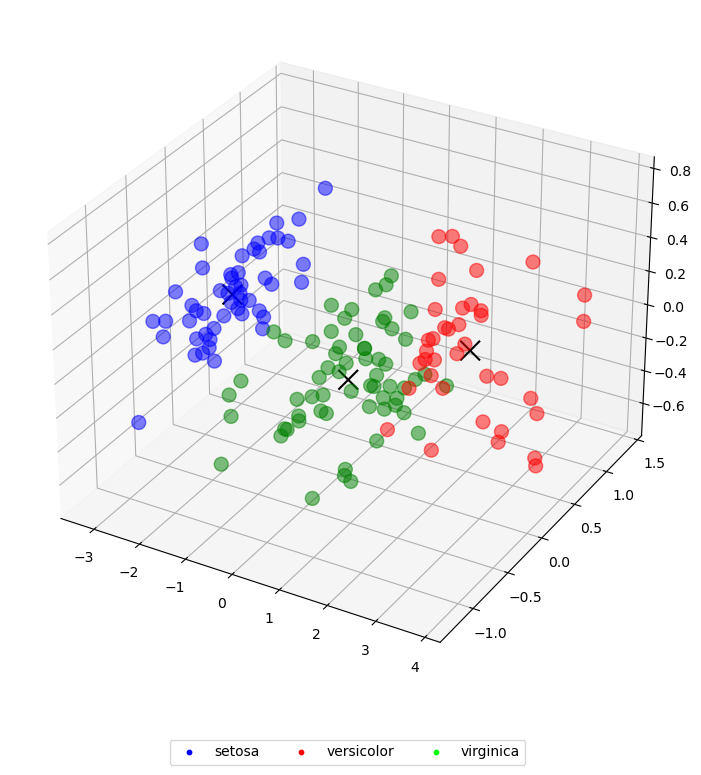

In [99]:
label_color = [LABEL_COLOR_MAP[l] for l in X3_clustered]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(reduced[1][:,0],reduced[1][:,1],reduced[1][:,2],s=100., c= label_color, alpha=0.5) 
ax.scatter(centers3[:,0],centers3[:,1],centers3[:,2],s=200., c= 'black',marker='x', alpha=1)
plt.legend(handles, t_names, loc="center", bbox_to_anchor=(0.5, -0.1), shadow=False, ncol=3)
plt.show()